<a href="https://colab.research.google.com/github/rgborges/DataScienceProjects/blob/master/Admission_Analysis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from plotnine import *
from plotnine.data import mpg
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [0]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv',
                    header=None,
                    skiprows=[0],
                    names=[
                        'Id',
                        'GRE_Score',
                        'TOEFL_Score',
                        'University_Rating',
                        'LOR',
                        'CGPA',
                        'Research',
                        'Chance_of_Admit'
                    ])

In [0]:
df.head(10)

In [0]:
df.describe(include='all')

Vamos salvar a base original em outro dataframe para podermos usar depois em outras aplicações.

In [0]:
non_changeble_df = df.copy()

### Remoção de Campos desnecessários 
O campo id informa apenas a identidade do usuário. Para fins de análise, esse campo não é necessário. Portanto precisamos removê-lo,

In [0]:
del df['Id']

In [0]:
print(df.dtypes)

### Ajustando os tipos de dados
Para análise explintório, faz sentido convertermos os campos categóricos de forma legível.

In [0]:
df_exploratory = df.copy()
new_research = pd.Categorical(df_exploratory['Research'])
new_research = new_research.rename_categories(['sem_pesquisa', 'com_pesquisa'])
df_exploratory['Research'] = new_research
df_exploratory.head(5)

,GRE_Score,TOEFL_Score,University_Rating,LOR,CGPA,Research,Chance_of_Admit
1,118,4,4.5,4.5,9.65,com_pesquisa,0.92
2,107,4,4.0,4.5,8.87,com_pesquisa,0.76
3,104,3,3.0,3.5,8.00,com_pesquisa,0.72
4,110,3,3.5,2.5,8.67,com_pesquisa,0.80
5,103,2,2.0,3.0,8.21,sem_pesquisa,0.65


In [0]:
# imprimindo o tipo dos dados
print('Tipos dos dados:\n',format(df_exploratory.dtypes))

Tipos dos dados:
 GRE_Score               int64
TOEFL_Score             int64
University_Rating     float64
LOR                   float64
CGPA                  float64
Research             category
Chance_of_Admit       float64
dtype: object


## Análise Exploratória


Vamos verificar a distribuição dos dados usando histogramas.

In [0]:
df.hist()

## Detecção de Outliers



/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)


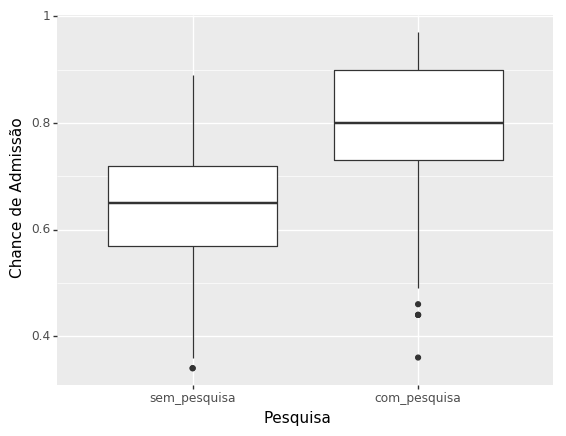

<ggplot: (8739327840064)>

In [0]:
ggplot(df_exploratory, aes(x='factor(Research)', y='Chance_of_Admit')) + \
           geom_boxplot() + \
           xlab("Pesquisa") + \
           ylab("Chance de Admissão")

#### NOTA - CONCLUSÃO

Pelo gráfico, podemos ver que o fato de ter uma pesquisa puplicada aumenta consideravelmente as chances de admissçao de um candidato .

In [0]:
index = np.where(df_exploratory['Chance_of_Admit'] == min(df_exploratory['Chance_of_Admit']))
print("Registros com valores extremos:\n", df_exploratory.loc[index], sep='\n')

Registros com valores extremos:

     GRE_Score  TOEFL_Score  University_Rating  LOR  CGPA      Research  \
92          97            3                5.0  3.5  7.66  sem_pesquisa   
376        101            2                2.0  2.5  7.66  sem_pesquisa   

     Chance_of_Admit  
92              0.38  
376             0.38  


In [0]:
bins = [(df_exploratory['Chance_of_Admit'] < 0.7),
        (df_exploratory['Chance_of_Admit'] >= 0.7)
]
lables = ['< 70%', '>= 70%']
df_exploratory['passou'] = np.select(bins, lables)


/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.6/site-packages/plotnine/guides/guide_legend

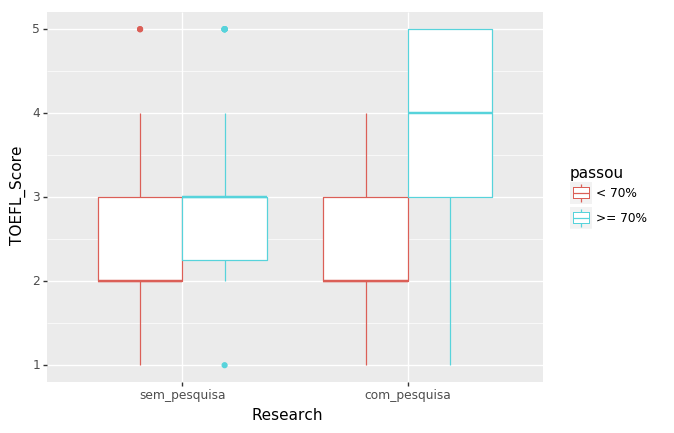

<ggplot: (8739327817350)>

In [0]:
ggplot(df_exploratory, aes(x='Research', y='TOEFL_Score', color='passou')) + \
geom_boxplot() 

/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.6/site-packages/plotnine/guides/guide_legend

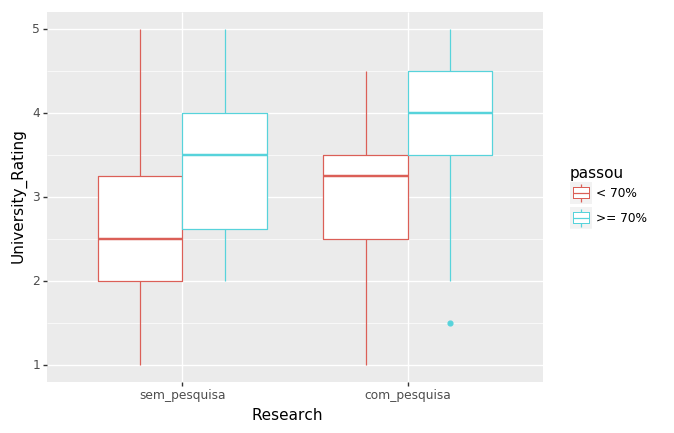

<ggplot: (8739327807117)>

In [0]:
ggplot(df_exploratory, aes(x='Research', y='University_Rating', color='passou')) + \
geom_boxplot() 

/opt/conda/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/opt/conda/lib/python3.6/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.6/site-packages/plotnine/guides/guide_legend

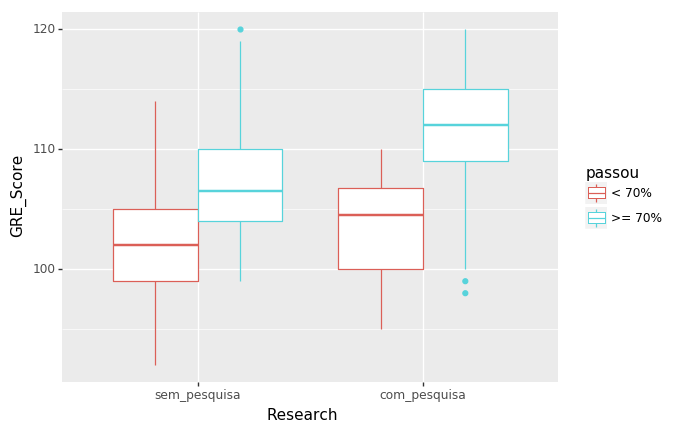

<ggplot: (-9223363297527005198)>

In [0]:
ggplot(df_exploratory, aes(x='Research', y='GRE_Score', color='passou')) + \
geom_boxplot() 

In [0]:
from pandas.plotting import scatter_matrix
attributes = ["Chance_of_Admit", "University_Rating", "TOEFL_Score",
"GRE_Score"]
scatter_matrix(df_exploratory, figsize=(16, 12))

# Variable Correlation

In [0]:
corr_matrix = df.corr()
corr_matrix

In [0]:
import seaborn as sns  #library for heatmap

#generate a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

# ML

### Multicolinearidade

O teste VIF, visa testar multicolinearidade entre os tributos de uma variável. Em modelos e algoritmos de ML, deve-se evitar o uso de atributos preditores que estejam altamente correlacionados.

In [0]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats


ml_df = non_changeble_df.copy()


In [0]:
#Realiza a função para o estimador VIF, a fim de removermos variáveis com multicoinearidade
def vif_cal(input_data, dependent_col):
  import statsmodels.formula.api as smf
  x_vars = input_data.drop([dependent_col], axis=1)
  xvar_names=x_vars.columns
  for i in range(0, xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=smf.ols(formula="y~x", data = x_vars).fit().rsquared
    vif=round(1/(1-rsq), 2)
    print(xvar_names[i], "VIF = ", vif)


vif_cal(input_data=ml_df, dependent_col="Chance_of_Admit")

No caso, se o VIF fosse superior a  deveriámos remover esse atributo do data_set. Como não obtiveos VIFs maiores que 5 podemos seguir:

In [0]:
X = ml_df[['GRE_Score'] + ['TOEFL_Score'] + ['University_Rating'] + ['LOR'] + ['CGPA'] + ['Research'] + ['GRE_Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

y = ml_df[['Chance_of_Admit']]

print("X dimenssions: ", X.shape)
print("y dimenssions: ", y.shape)

In [0]:
X1 = sm.add_constant(X)
ols_admission_model1 = sm.OLS(y, X1).fit()
print(ols_admission_model1.summary())

In [0]:
lr = linear_model.LinearRegression()
model1 = lr.fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Acurácia na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lr.score(X_test, y_test)))

### Conclusão

Separando as base original em uma bases de treinamento, e usando um modelo de regressão linear, obtivemos uma acurácia de 78%.

## Usando o método MixMaxScaler

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X = ml_df[['GRE_Score'] + ['TOEFL_Score'] + ['University_Rating'] + ['LOR'] + ['CGPA'] + ['Research'] + ['GRE_Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

y = ml_df[['Chance_of_Admit']]

print('Atributos originais: ', X.shape)

X = MinMaxScaler().fit_transform(ml_df)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print('Polynomial Feature (atributos redundantes)')
print(X.shape)
y = ml_df[['Chance_of_Admit']]

In [0]:
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Acurácia na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lr.score(X_test, y_test)))


## Usando Ridge (Regressão linear com regularização L2)

In [0]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))